In [1]:
#World Happiness

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import plotly.express as px
import warnings  

# Ignore all warnings  
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
world_df = pd.read_csv("Dataset/World_Happiness_2015_2017_.csv")

world_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [3]:
# to explore:
print(len(world_df))

470


In [4]:
#Columns present
print(world_df.columns)
print(world_df.nunique())  # See how many unique values are in each column
print(world_df.shape) 

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
Country                          166
Happiness Rank                   158
Happiness Score                  449
Economy (GDP per Capita)         467
Family                           468
Health (Life Expectancy)         466
Freedom                          462
Trust (Government Corruption)    466
Generosity                       468
Dystopia Residual                470
Year                               3
dtype: int64
(470, 11)


In [5]:
#Missing values
world_df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [6]:
#Data types

world_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Happiness Rank                 470 non-null    int64  
 2   Happiness Score                470 non-null    float64
 3   Economy (GDP per Capita)       470 non-null    float64
 4   Family                         470 non-null    float64
 5   Health (Life Expectancy)       470 non-null    float64
 6   Freedom                        470 non-null    float64
 7   Trust (Government Corruption)  470 non-null    float64
 8   Generosity                     470 non-null    float64
 9   Dystopia Residual              470 non-null    float64
 10  Year                           470 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 40.5+ KB


In [7]:
#Basic distributions
world_df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717,2015.993617
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772,0.816907
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720,2017.000000


🔍 Step 2: Data Cleaning
Standardize column names (remove whitespace, lowercase, rename if inconsistent across years).

Check for and handle missing values (df.isnull().sum()).

Convert year column to int if necessary.

Ensure country names are consistent.

In [8]:
print(len(world_df['Country'].unique()))
print(world_df['Country'].unique())

166
['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Ph

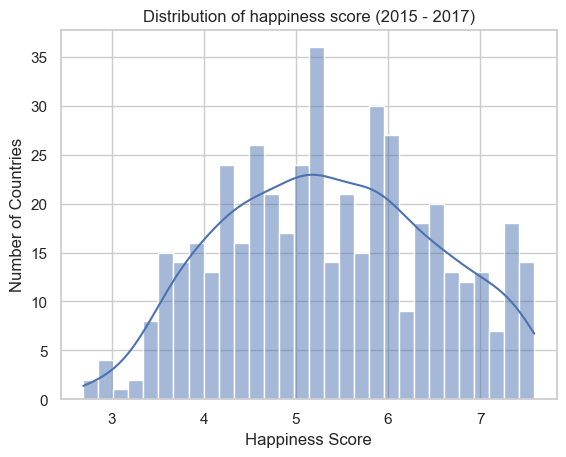

In [14]:
#Overall distribution of happiness scores
sns.histplot(data = world_df, x = "Happiness Score", bins = 30, kde = True)
plt.title('Distribution of happiness score (2015 - 2017)')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.show()

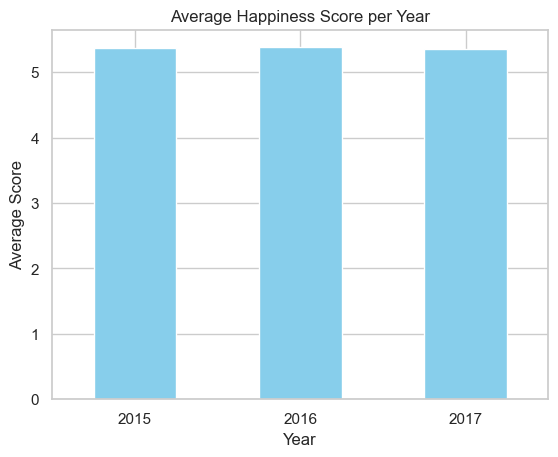

In [17]:
#Average happiness score per year - To see if the world is becoming happier or sadder.
avg_score_year = world_df.groupby('Year')['Happiness Score'].mean()

avg_score_year.plot(kind='bar', color='skyblue')
plt.title('Average Happiness Score per Year')
plt.ylabel('Average Score')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.show()


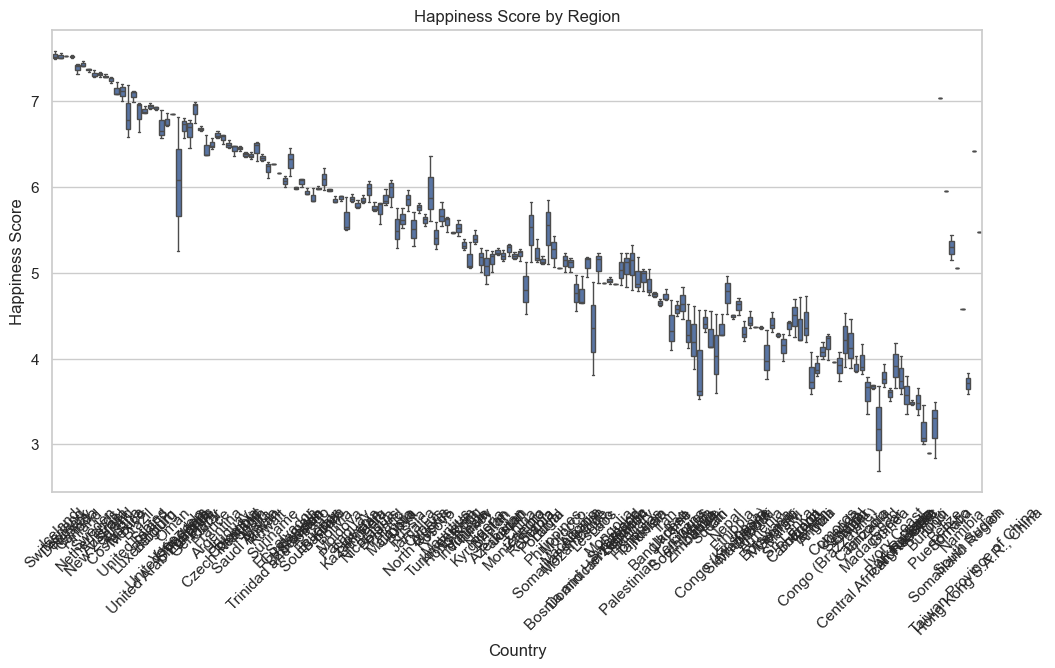

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='Happiness Score', data=world_df)
plt.xticks(rotation=45)
plt.title('Happiness Score by Region')
plt.show()

#too many countries

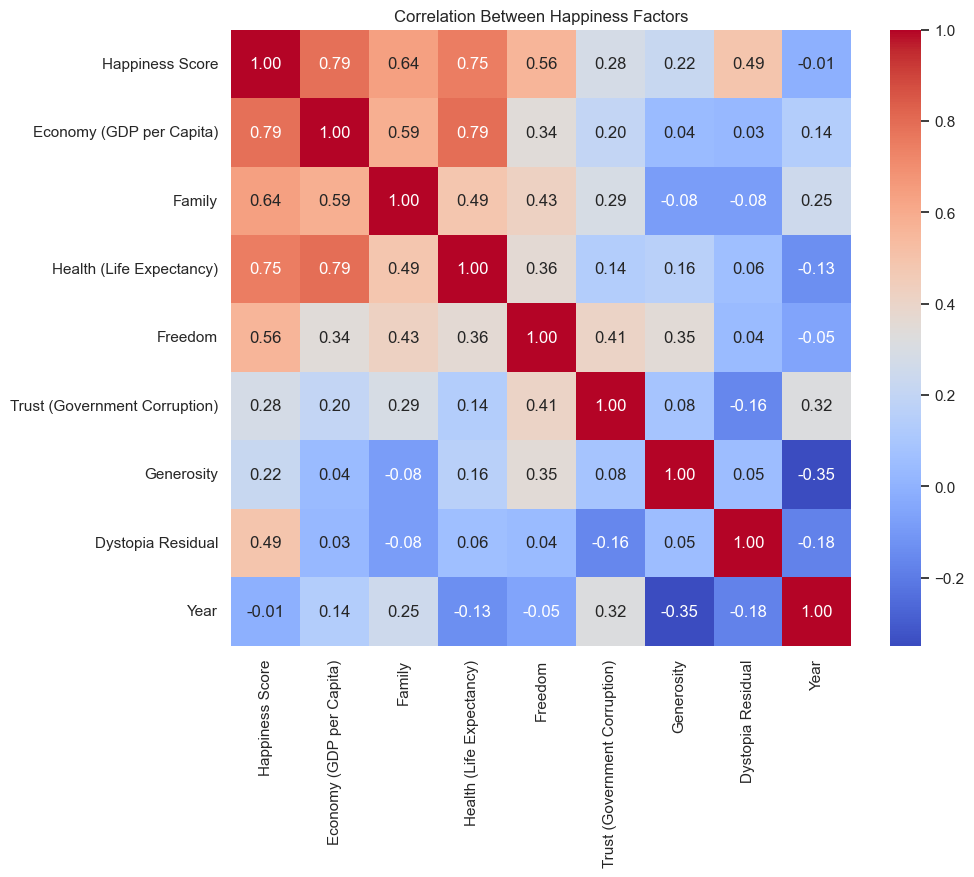

In [21]:
#Correlation heatmap
# Select only numeric columns (excluding 'Year' and 'Happiness Rank' if needed)
#how features like economy, health, and trust relate to happiness.
numeric_cols = world_df.select_dtypes(include='number').drop(['Happiness Rank'], axis=1)

plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Happiness Factors')
plt.show()


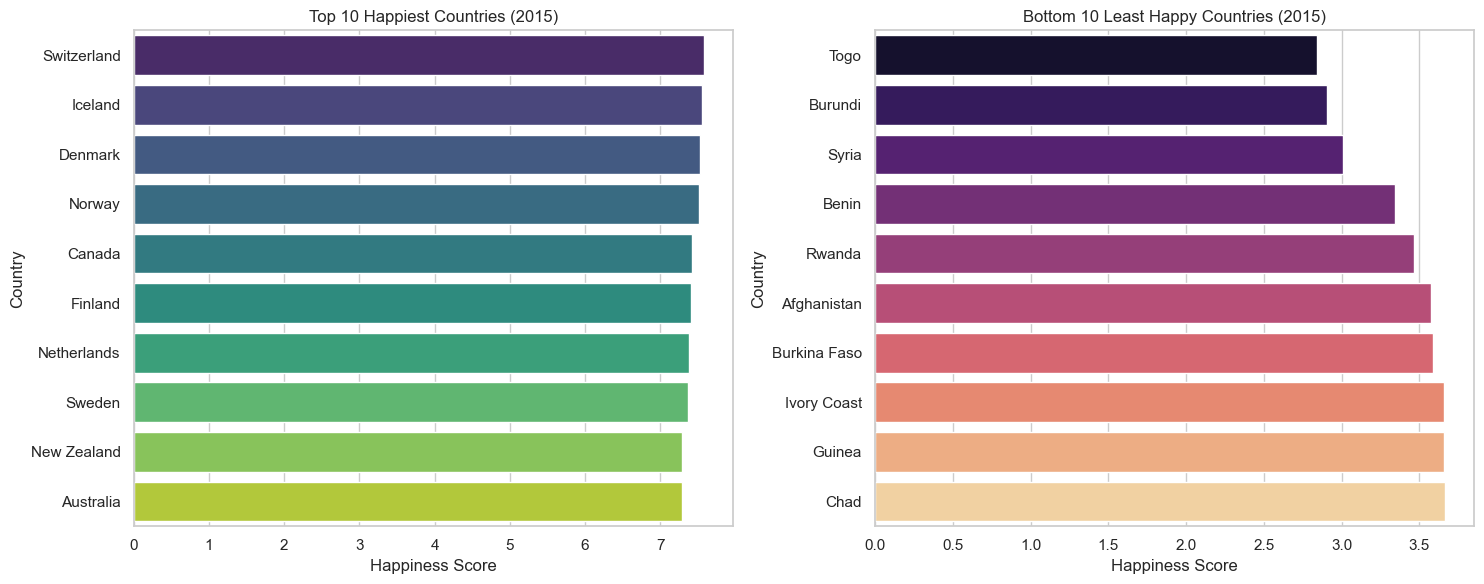

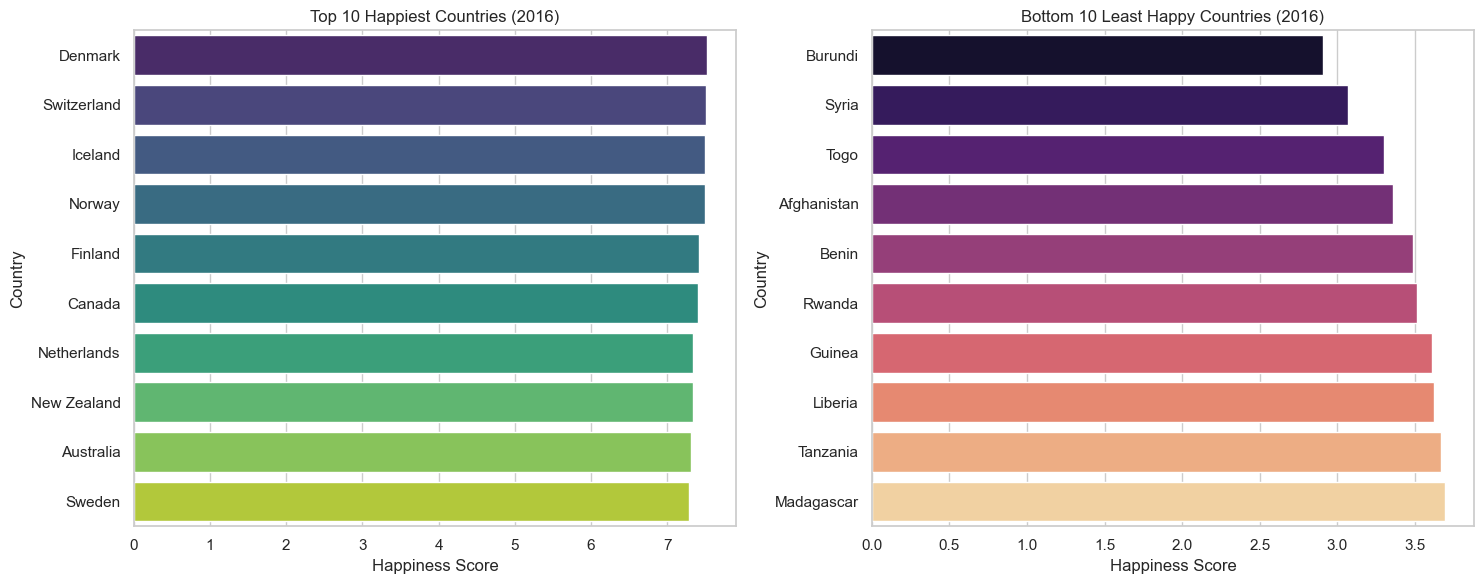

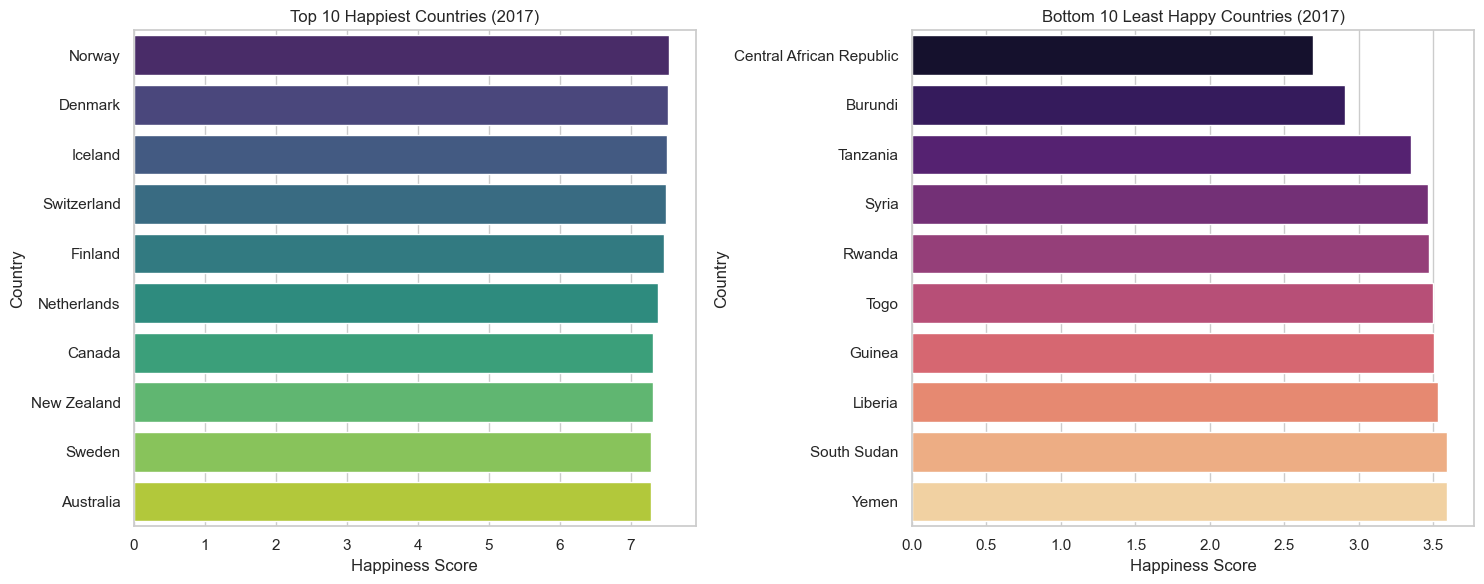

In [23]:
#highlight which countries consistently rank high or low
def plot_top_bottom(df, year):
    data = df[df['Year'] == year]
    top_10 = data.nlargest(10, 'Happiness Score')
    bottom_10 = data.nsmallest(10, 'Happiness Score')

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.barplot(data=top_10, y='Country', x='Happiness Score', ax=axes[0], palette='viridis')
    axes[0].set_title(f'Top 10 Happiest Countries ({year})')

    sns.barplot(data=bottom_10, y='Country', x='Happiness Score', ax=axes[1], palette='magma')
    axes[1].set_title(f'Bottom 10 Least Happy Countries ({year})')

    plt.tight_layout()
    plt.show()

for y in world_df['Year'].unique():
    plot_top_bottom(world_df, y)


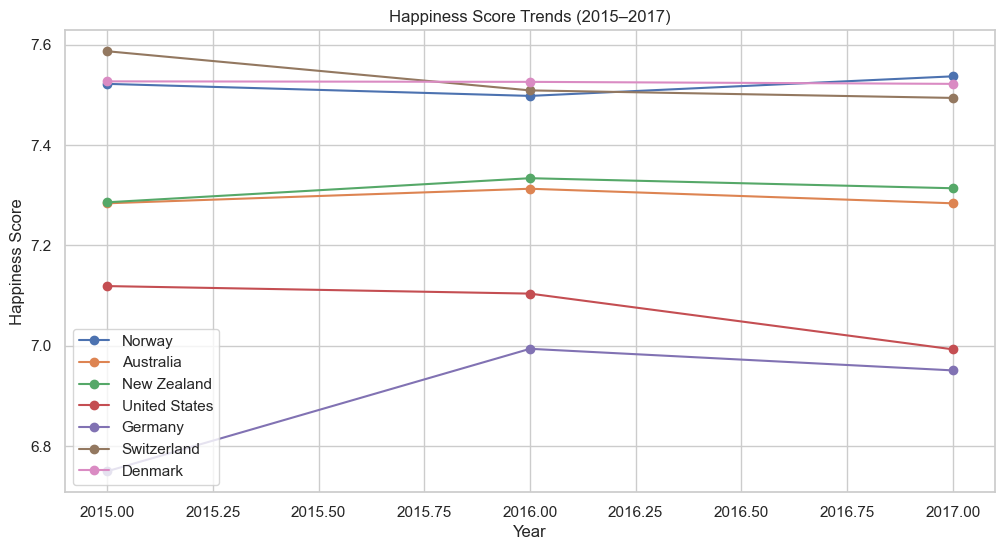

In [30]:
#visualize if certain countries are improving or declining in happiness.
countries = ['Norway', 'Australia', 'New Zealand' , 'United States', 'Germany', 'Switzerland', 'Denmark']  

plt.figure(figsize=(12,6))
for country in countries:
    country_data = world_df[world_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Happiness Score'], marker='o', label=country)

plt.title('Happiness Score Trends (2015–2017)')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()


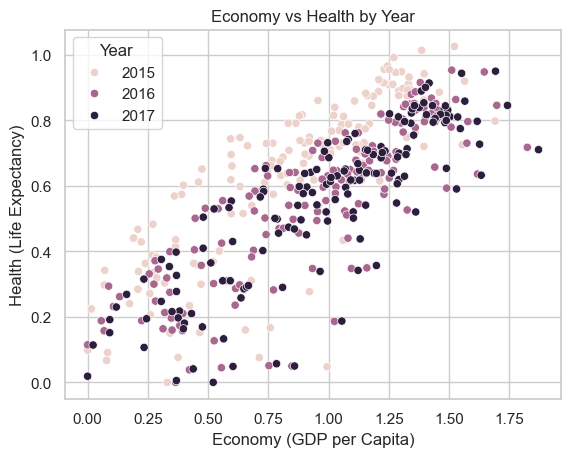

In [37]:
# Scatter plot  Ecomnomy vs Health.
sns.scatterplot(data=world_df, x='Economy (GDP per Capita)', y='Health (Life Expectancy)', hue='Year')

plt.title('Economy vs Health by Year')
plt.show()


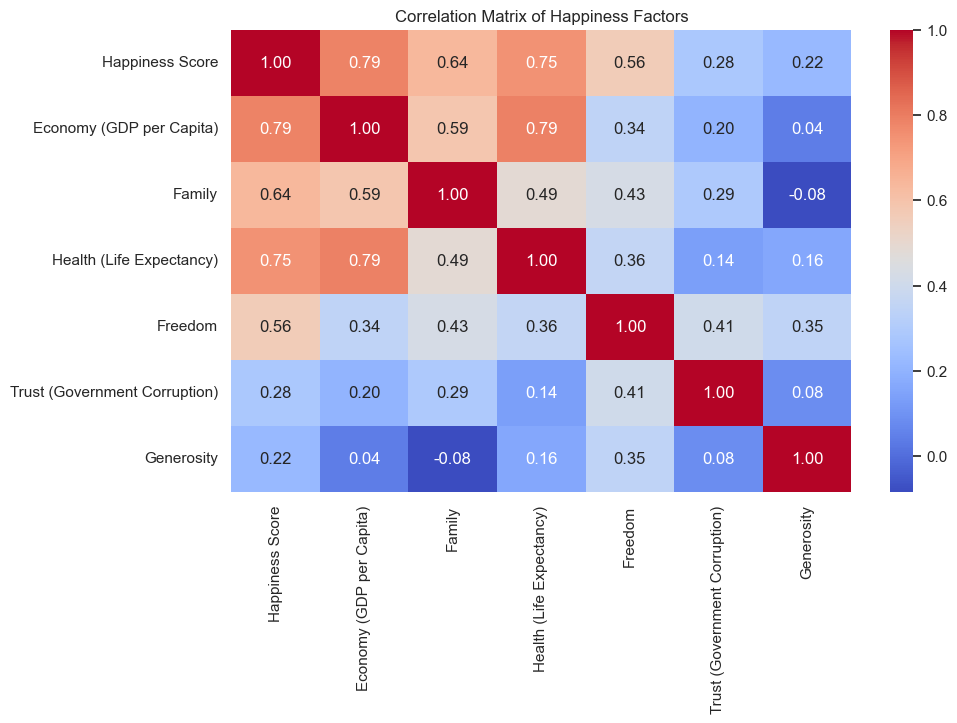

In [48]:
#Which factors are most correlated with happiness?
# Select relevant columns
corr_cols = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
             'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Correlation matrix
corr_matrix = world_df[corr_cols].corr()

# Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Happiness Factors')
plt.show()

#print(corr_matrix)

In [45]:
#Which countries improved or declined in happiness the most over time?
# Pivot table to compare scores by year
pivot_df = world_df.pivot_table(index='Country', columns='Year', values='Happiness Score')

# Drop countries missing data in any year
pivot_df = pivot_df.dropna()

# Calculate change
pivot_df['Change_2015_to_2017'] = pivot_df[2017] - pivot_df[2015]

# Top improvers
print("Top 10 improvers:")
print(pivot_df['Change_2015_to_2017'].sort_values(ascending=False).head(10))

# Top decliners
print("\nTop 10 decliners:")
print(pivot_df['Change_2015_to_2017'].sort_values().head(10))


Top 10 improvers:
Country
Latvia         0.752
Romania        0.701
Togo           0.656
Senegal        0.631
Gabon          0.569
Egypt          0.541
Ivory Coast    0.525
Hungary        0.524
Bulgaria       0.496
Syria          0.456
Name: Change_2015_to_2017, dtype: float64

Top 10 decliners:
Country
Venezuela   -1.560
Liberia     -1.038
Haiti       -0.915
Zimbabwe    -0.735
Zambia      -0.615
Mexico      -0.609
Ukraine     -0.585
Botswana    -0.566
Ghana       -0.513
Yemen       -0.484
Name: Change_2015_to_2017, dtype: float64


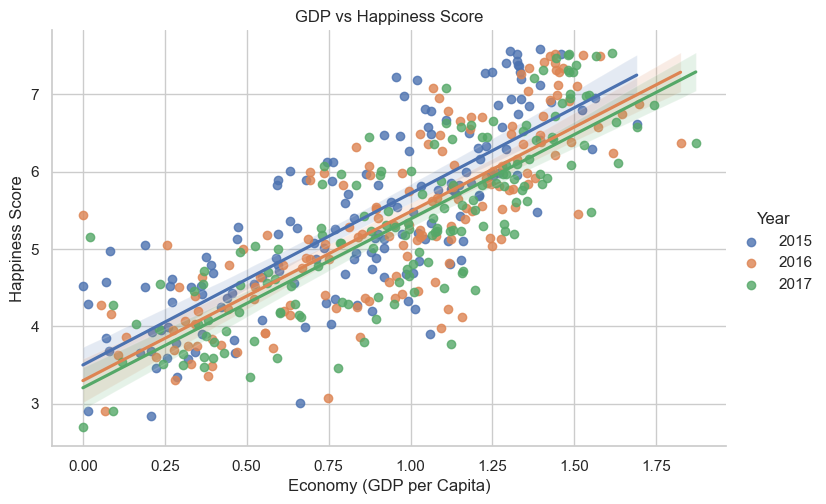

                          Economy (GDP per Capita)  Happiness Score
Economy (GDP per Capita)                   1.00000          0.78545
Happiness Score                            0.78545          1.00000


In [42]:
# Scatter plot - Is GDP strongly linked to happiness?
sns.lmplot(data=world_df, x='Economy (GDP per Capita)', y='Happiness Score', hue='Year', aspect=1.5)
plt.title("GDP vs Happiness Score")
plt.show()
print(world_df[['Economy (GDP per Capita)', 'Happiness Score']].corr())


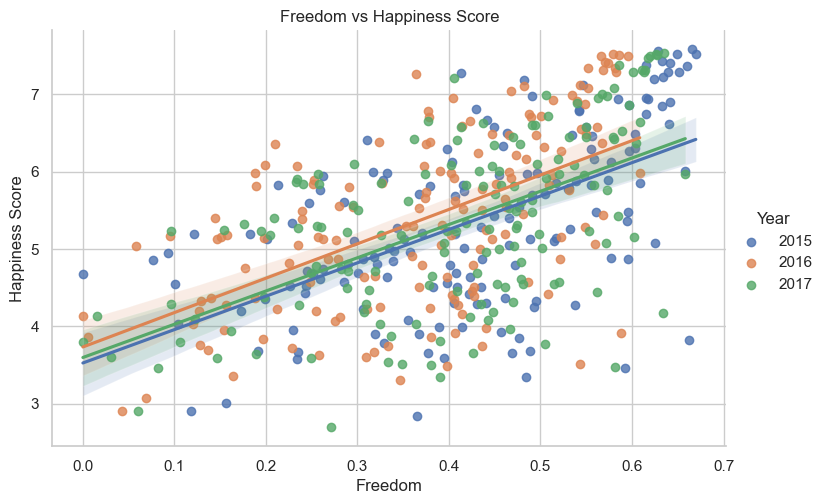

                  Freedom  Happiness Score
Freedom          1.000000         0.560353
Happiness Score  0.560353         1.000000


In [44]:
# Scatter plot - Do people in freer countries report higher happiness?
sns.lmplot(data=world_df, x='Freedom', y='Happiness Score', hue='Year', aspect=1.5)
plt.title("Freedom vs Happiness Score")
plt.show()

# Correlation
print(world_df[['Freedom', 'Happiness Score']].corr())


🧠 Step 5: Insights and Reporting
Summarize key findings:

What contributes most to happiness? The strongest contributor to happiness is Economy (GDP per Capita), with a correlation of 0.785. Other strong contributors include Health (Life Expectancy) and Family. Wealthier countries tend to be happier, especially when combined with good healthcare, strong family/social support, and personal freedom.

How does happiness shift geographically or over time?
Countries with the most positive change in happiness score:

Latvia (+0.75)

Romania (+0.70)

Most are developing or reforming nations, showing progress in well-being.

Happiness tends to decline sharply in countries undergoing instability or recession, while consistent reforms or development lead to increases in happiness over time.



In [12]:
📦 Step 6: Optional – Modeling
Try linear regression to predict happiness score from other features.

Evaluate model performance using R², MAE, etc.

SyntaxError: invalid character '📦' (U+1F4E6) (574496257.py, line 1)

In [13]:
📚 Step 7: Wrap-Up

Cleaned code

Visuals

Markdown cells explaining each section

Prepare a concise README with project purpose, methodology, key findings, and next steps.

SyntaxError: invalid character '📚' (U+1F4DA) (2021278752.py, line 1)